In [46]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import Adam

In [47]:
dataset_path = "Petimages"

In [48]:
def load_data(dataset_path):
    X = []
    y = []

    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                try:
                    image = load_img(image_path, target_size=(64, 64))
                    image_array = img_to_array(image)
                    X.append(image_array)
                    y.append(category)
                except Exception as e:
                    print(f"Error loading {image_path}: {str(e)}")

    X = np.array(X)
    y = np.array(y)

    return X, y


In [49]:
X, y = load_data(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

/home/bhavana/.local/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error loading Petimages/Cat/Thumbs.db: cannot identify image file <_io.BytesIO object at 0x7f8aaf803ec0>


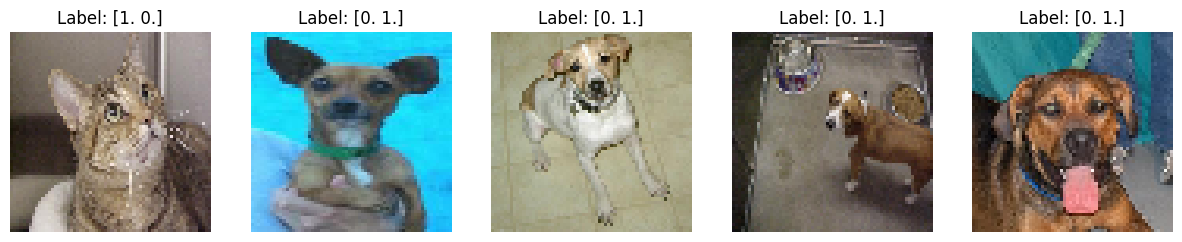

In [50]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img


num_samples = 5
random_indices = random.sample(range(len(X_train)), num_samples)

# Display the images along with their true labels
plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, num_samples, i)
    plt.imshow(array_to_img(X_train[idx]))
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.show()

In [51]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # 2 output neurons for cats and dogs


In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=20)


Epoch 1/20
589/589 [==============================] - 23s 37ms/step - loss: 1.3298 - accuracy: 0.5891
Epoch 2/20
589/589 [==============================] - 22s 37ms/step - loss: 0.6108 - accuracy: 0.6673
Epoch 3/20
589/589 [==============================] - 22s 37ms/step - loss: 0.5298 - accuracy: 0.7335
Epoch 4/20
589/589 [==============================] - 22s 37ms/step - loss: 0.4834 - accuracy: 0.7638
Epoch 5/20
589/589 [==============================] - 22s 37ms/step - loss: 0.4284 - accuracy: 0.7997
Epoch 6/20
589/589 [==============================] - 22s 37ms/step - loss: 0.3908 - accuracy: 0.8223
Epoch 7/20
589/589 [==============================] - 23s 39ms/step - loss: 0.3545 - accuracy: 0.8422
Epoch 8/20
589/589 [==============================] - 23s 39ms/step - loss: 0.3198 - accuracy: 0.8591
Epoch 9/20
589/589 [==============================] - 23s 38ms/step - loss: 0.2868 - accuracy: 0.8775
Epoch 10/20
589/589 [==============================] - 23s 39ms/step - loss: 0.249

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

148/148 [==============================] - 2s 14ms/step - loss: 0.8507 - accuracy: 0.8101
Test Loss: 0.8507228493690491, Test Accuracy: 0.8101104497909546


In [54]:
test_predictions = model.predict(X_test)

148/148 [==============================] - 2s 14ms/step


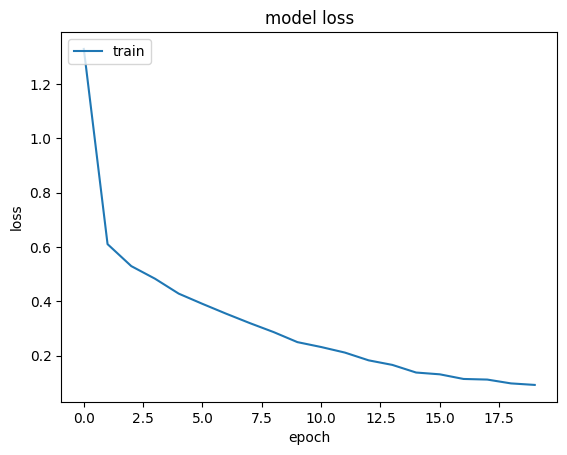

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [56]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Assuming you have already trained your model and obtained predictions
test_predictions = model.predict(X_test)

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
binary_predictions = (test_predictions > threshold).astype(int)

# Assuming y_test is a binary matrix representing the ground truth labels
# (each row corresponds to a sample, and each column corresponds to a class)
confusion = multilabel_confusion_matrix(y_test, binary_predictions)

# Print the confusion matrix for each class
for i, confusion_matrix in enumerate(confusion):
    print(f"Confusion Matrix for Class {i}:")
    print(confusion_matrix)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))



148/148 [==============================] - 2s 14ms/step
Confusion Matrix for Class 0:
[[1360  858]
 [ 935 1555]]
Confusion Matrix for Class 1:
[[1680  810]
 [ 716 1502]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      2490
           1       0.65      0.68      0.66      2218

   micro avg       0.65      0.65      0.65      4708
   macro avg       0.65      0.65      0.65      4708
weighted avg       0.65      0.65      0.65      4708
 samples avg       0.49      0.65      0.55      4708



/home/bhavana/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
